In [22]:
# Importación de librerías
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import pandas as pd

# Carga del dataset
df = pd.read_csv('Dataset_Loja_Preprocesado.csv') 


In [1]:
import pandas as pd

# Cargar datos
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print("Conteo de registros por Año:")
    print(df['ANIO'].value_counts().sort_index())
except:
    print("Carga primero tu dataset.")

Conteo de registros por Año:
ANIO
2020    31780
2021    37210
2022    35197
2023    32532
2024    31066
Name: count, dtype: int64


C:\Users\santi\AppData\Local\Temp\ipykernel_9688\1632134846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='TIPO_CONTRIBUYENTE', y='VALOR_RECAUDADO', data=df,


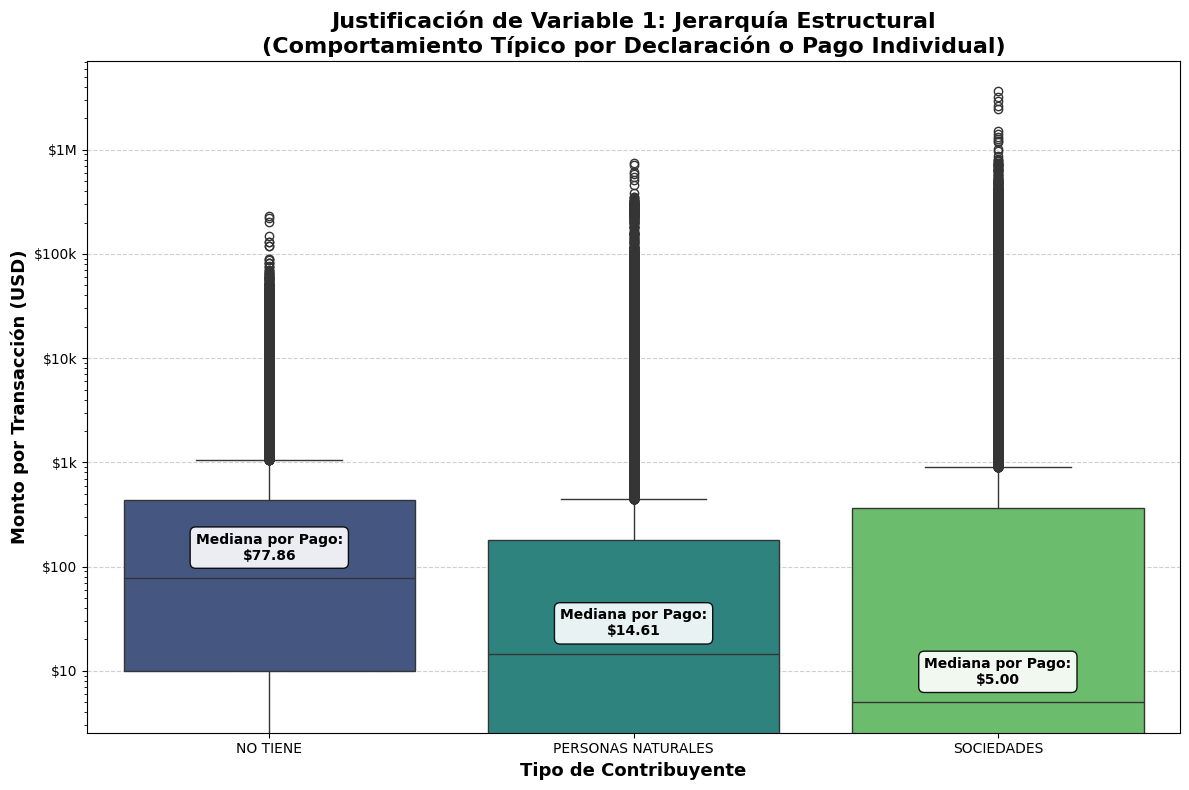

In [23]:
# =============================================================================
# GRÁFICO 1 (CORREGIDO): MEDIANA POR TRANSACCIÓN/DECLARACIÓN
# =============================================================================
plt.figure(figsize=(12, 8))

orden_tipos = ['NO TIENE', 'PERSONAS NATURALES', 'SOCIEDADES']

# Boxplot
ax = sns.boxplot(x='TIPO_CONTRIBUYENTE', y='VALOR_RECAUDADO', data=df, 
                 order=orden_tipos, palette='viridis')

# 1. ESCALA Y FORMATO
ax.set_yscale('log')

def formato_dinero(x, pos):
    if x >= 1e6: return f'${x*1e-6:.0f}M'
    if x >= 1e3: return f'${x*1e-3:.0f}k'
    return f'${x:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))

# 2. ETIQUETAS DE LA MEDIANA
datos_agrupados = df.groupby('TIPO_CONTRIBUYENTE')['VALOR_RECAUDADO'].median()

for i, categoria in enumerate(orden_tipos):
    val_mediana = datos_agrupados.get(categoria, 0)
    
    # Texto explicativo
    ax.text(i, val_mediana * 1.4, 
            f'Mediana por Pago:\n${val_mediana:,.2f}', 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=10, weight='bold', color='black',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, boxstyle='round,pad=0.4'))

# 3. TÍTULOS EXPLÍCITOS (AQUÍ ESTÁ LA CLAVE)
plt.title('Justificación de Variable 1: Jerarquía Estructural\n(Comportamiento Típico por Declaración o Pago Individual)', fontsize=16, weight='bold')
plt.ylabel('Monto por Transacción (USD)', fontsize=13, weight='bold') # <--- CAMBIO IMPORTANTE
plt.xlabel('Tipo de Contribuyente', fontsize=13, weight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.6, which='major')
plt.tight_layout()
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_9688\3122624753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='CLUSTER_GEO', y='VALOR_RECAUDADO', data=df, palette='coolwarm')


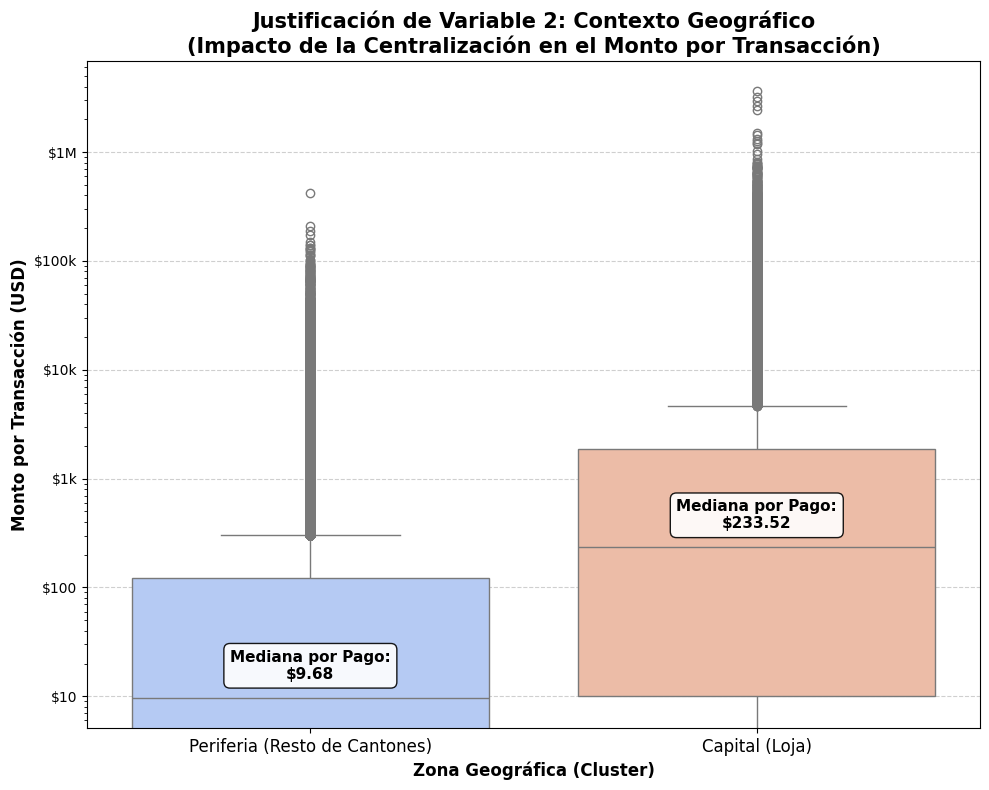

In [24]:
# =============================================================================
# GRÁFICO 2 (MEJORADO): CONTEXTO GEOGRÁFICO CON MONTOS REALES
# =============================================================================

plt.figure(figsize=(10, 8))

# Boxplot
ax = sns.boxplot(x='CLUSTER_GEO', y='VALOR_RECAUDADO', data=df, palette='coolwarm')

# 1. ESCALA Y FORMATO DE DINERO
ax.set_yscale('log')

def formato_dinero(x, pos):
    if x >= 1e6: return f'${x*1e-6:.0f}M'
    if x >= 1e3: return f'${x*1e-3:.0f}k'
    return f'${x:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))

# 2. ETIQUETAS DE MEDIANA
# Agrupamos por CLUSTER_GEO (0 y 1)
datos_geo = df.groupby('CLUSTER_GEO')['VALOR_RECAUDADO'].median()
etiquetas_x = [0, 1] # Los valores reales del eje X

for i in etiquetas_x:
    val_mediana = datos_geo.get(i, 0)
    
    # Texto explicativo
    # Multiplicamos por 1.4 para que flote encima de la mediana visual
    ax.text(i, val_mediana * 1.4, 
            f'Mediana por Pago:\n${val_mediana:,.2f}', 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=11, weight='bold', color='black',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.9, boxstyle='round,pad=0.4'))

# 3. TÍTULOS Y ETIQUETAS MANUALES
plt.title('Justificación de Variable 2: Contexto Geográfico\n(Impacto de la Centralización en el Monto por Transacción)', fontsize=15, weight='bold')
plt.ylabel('Monto por Transacción (USD)', fontsize=12, weight='bold')
plt.xlabel('Zona Geográfica (Cluster)', fontsize=12, weight='bold')

# Reemplazamos 0 y 1 por texto claro
plt.xticks([0, 1], ['Periferia (Resto de Cantones)', 'Capital (Loja)'], fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.6, which='major')
plt.tight_layout()
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_9688\4289415188.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_cantones.values, y=conteo_cantones.index, palette='pastel')


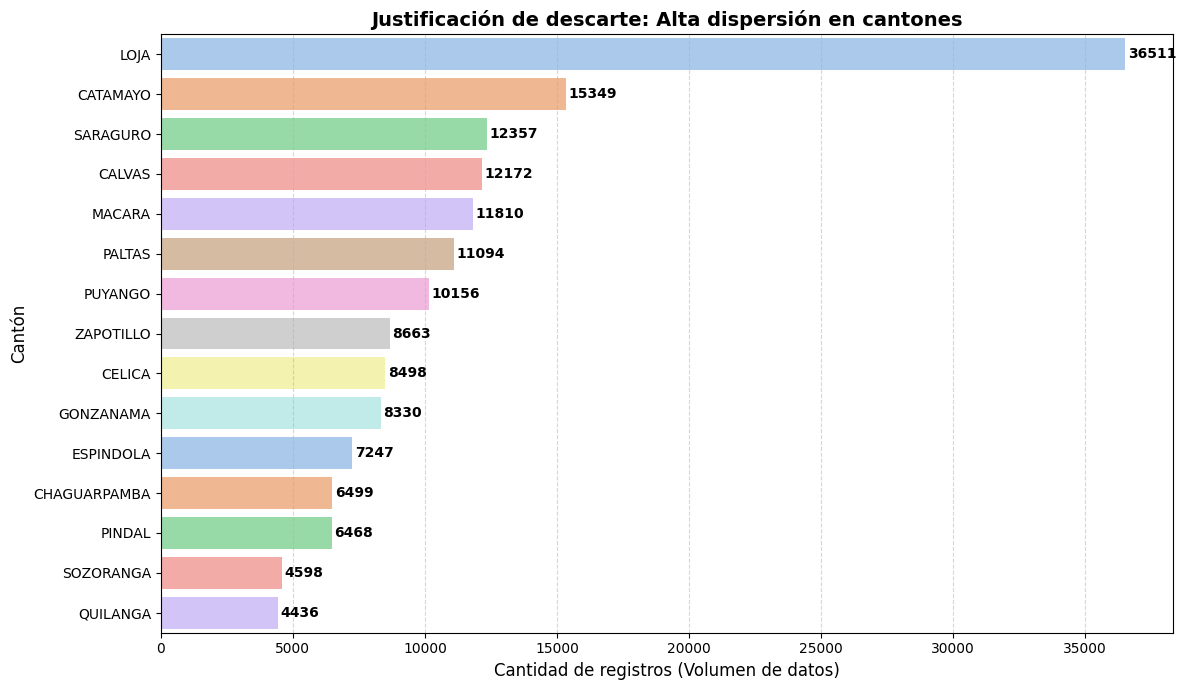

In [28]:
# =============================================================================
# GRÁFICO 3: JUSTIFICACIÓN DE DESCARTE (SPARSITY EN CANTONES)
# =============================================================================
plt.figure(figsize=(12, 7))

# Calculamos el conteo para mostrar la desproporción
conteo_cantones = df['CANTON'].value_counts().nlargest(15) # Top 15 para que se vea claro

# Gráfico de barras horizontal
sns.barplot(x=conteo_cantones.values, y=conteo_cantones.index, palette='pastel')

plt.title('Justificación de descarte: Alta dispersión en cantones', fontsize=14, weight='bold')
plt.xlabel('Cantidad de registros (Volumen de datos)', fontsize=12)
plt.ylabel('Cantón', fontsize=12)

# Añadir el valor al final de cada barra para evidenciar la caída
for i, v in enumerate(conteo_cantones.values):
    plt.text(v + 100, i, str(v), color='black', va='center', fontweight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

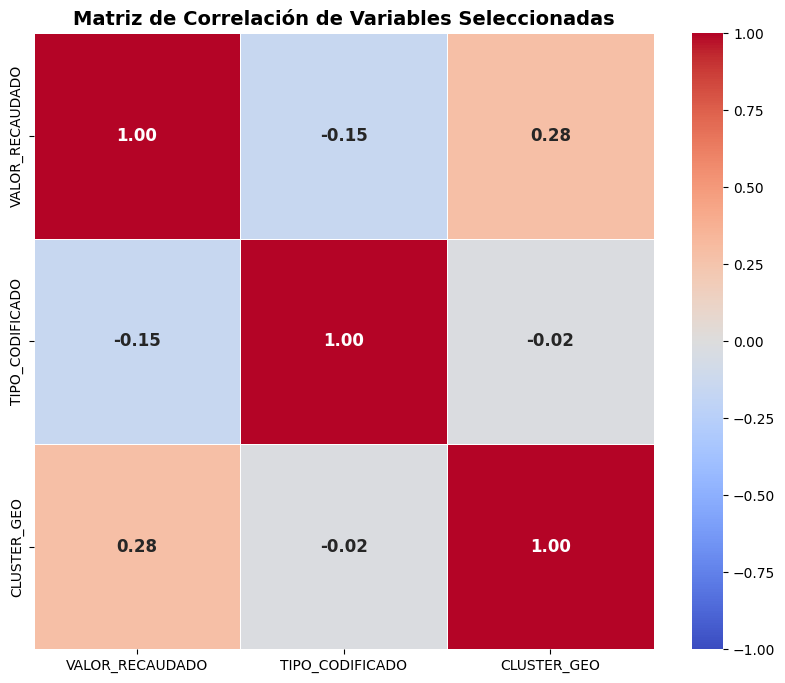

MATRIZ DE CORRELACIÓN DE SPEARMAN - JUSTIFICACIÓN PARA ISOLATION FOREST
                 VALOR_RECAUDADO  TIPO_CODIFICADO  CLUSTER_GEO
VALOR_RECAUDADO         1.000000        -0.150510     0.281589
TIPO_CODIFICADO        -0.150510         1.000000    -0.021664
CLUSTER_GEO             0.281589        -0.021664     1.000000

CORRELACIONES ESPECÍFICAS (Variables Independientes)

► VALOR_RECAUDADO vs TIPO_CODIFICADO: -0.1505
► VALOR_RECAUDADO vs CLUSTER_GEO:     0.2816
► TIPO_CODIFICADO vs CLUSTER_GEO:     -0.0217


In [26]:
# =============================================================================
# BLOQUE 4: ANÁLISIS DE CORRELACIÓN (JUSTIFICACIÓN DE INDEPENDENCIA)
# =============================================================================

# Aseguramos que TIPO esté codificado numéricamente para poder correlacionar
mapeo_tipo = {'NO TIENE': 0, 'PERSONAS NATURALES': 1, 'SOCIEDADES': 2}
df['TIPO_CODIFICADO'] = df['TIPO_CONTRIBUYENTE'].map(mapeo_tipo).fillna(0)

# Seleccionamos las 3 variables candidatas
features_corr = ['VALOR_RECAUDADO', 'TIPO_CODIFICADO', 'CLUSTER_GEO']

# Calculamos Correlación de Spearman (Mejor para variables no normales/ordinales)
matriz_corr = df[features_corr].corr(method='spearman')

# Graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 12, "weight": "bold"})

plt.title('Matriz de Correlación de Variables Seleccionadas', fontsize=14, weight='bold')
plt.show()

# Después de plt.show() en el heatmap

print("=" * 70)
print("MATRIZ DE CORRELACIÓN DE SPEARMAN - JUSTIFICACIÓN PARA ISOLATION FOREST")
print("=" * 70)
print(matriz_corr)

print("\n" + "=" * 70)
print("CORRELACIONES ESPECÍFICAS (Variables Independientes)")
print("=" * 70)
print(f"\n► VALOR_RECAUDADO vs TIPO_CODIFICADO: {matriz_corr.loc['VALOR_RECAUDADO', 'TIPO_CODIFICADO']:.4f}")
print(f"► VALOR_RECAUDADO vs CLUSTER_GEO:     {matriz_corr.loc['VALOR_RECAUDADO', 'CLUSTER_GEO']:.4f}")
print(f"► TIPO_CODIFICADO vs CLUSTER_GEO:     {matriz_corr.loc['TIPO_CODIFICADO', 'CLUSTER_GEO']:.4f}")
